In [1]:
import pandas as pd
import numpy as np

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
!ls

drive  sample_data


In [47]:
df = pd.read_excel('/content/drive/My Drive/SIH/NM390.xlsx')

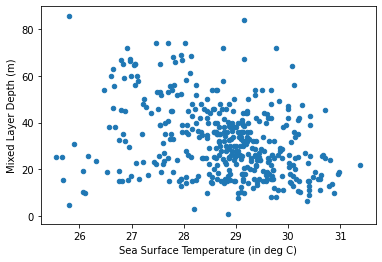

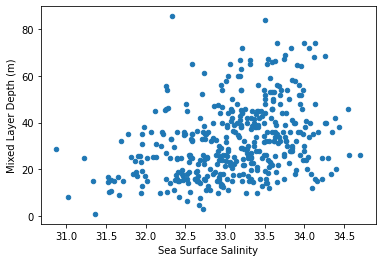

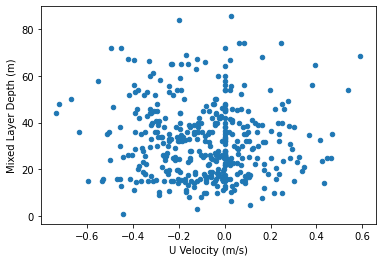

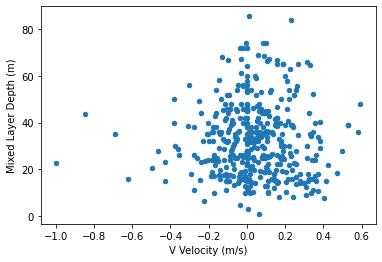

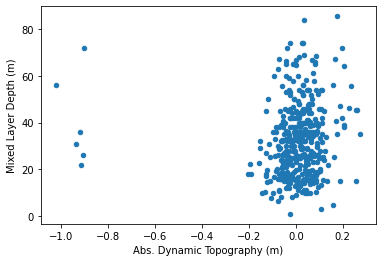

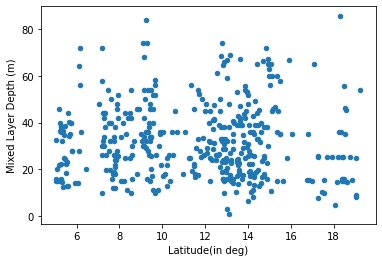

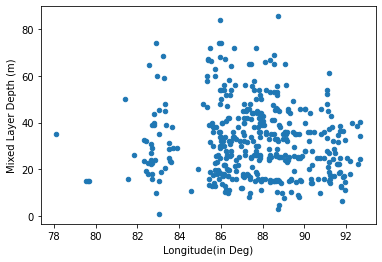

In [48]:
df.plot.scatter(x='Sea Surface Temperature (in deg C)', y='Mixed Layer Depth (m)')
df.plot.scatter(x='Sea Surface Salinity', y='Mixed Layer Depth (m)')
df.plot.scatter(x='U Velocity (m/s)', y='Mixed Layer Depth (m)')
df.plot.scatter(x='V Velocity (m/s)', y='Mixed Layer Depth (m)')
df.plot.scatter(x='Abs. Dynamic Topography (m)', y='Mixed Layer Depth (m)')
df.plot.scatter(x='Latitude(in deg)', y='Mixed Layer Depth (m)')
df.plot.scatter(x='Longitude(in Deg)', y='Mixed Layer Depth (m)')

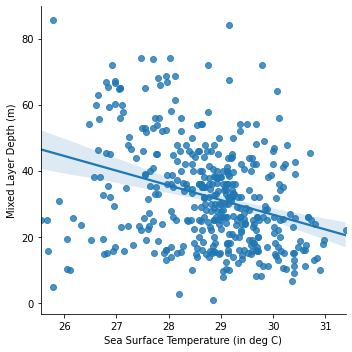

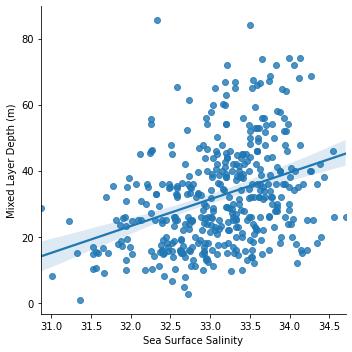

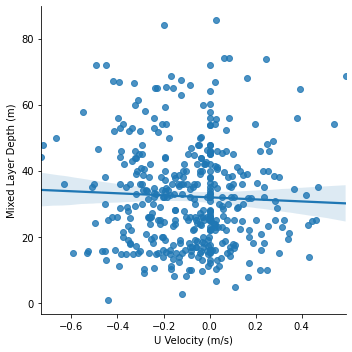

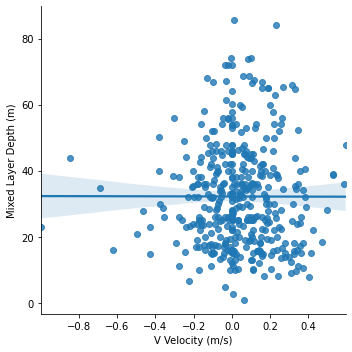

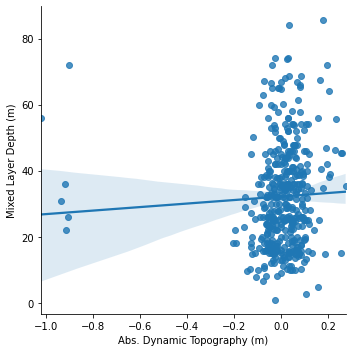

In [49]:
import seaborn as sns
sns.lmplot(x='Sea Surface Temperature (in deg C)',y='Mixed Layer Depth (m)',data=df,fit_reg=True)
sns.lmplot(x='Sea Surface Salinity',y='Mixed Layer Depth (m)',data=df,fit_reg=True)
sns.lmplot(x='U Velocity (m/s)',y='Mixed Layer Depth (m)',data=df,fit_reg=True)
sns.lmplot(x='V Velocity (m/s)',y='Mixed Layer Depth (m)',data=df,fit_reg=True)
sns.lmplot(x='Abs. Dynamic Topography (m)',y='Mixed Layer Depth (m)',data=df,fit_reg=True)

In [50]:
print(df['Mixed Layer Depth (m)'].corr(df['Sea Surface Temperature (in deg C)']))
print(df['Mixed Layer Depth (m)'].corr(df['Sea Surface Salinity']))
print(df['Mixed Layer Depth (m)'].corr(df['U Velocity (m/s)']))
print(df['Mixed Layer Depth (m)'].corr(df['V Velocity (m/s)']))
print(df['Mixed Layer Depth (m)'].corr(df['Abs. Dynamic Topography (m)']))

-0.3133237231739797
0.35172635427541243
-0.04211657804770224
-0.0014362704017658898
0.04622034199035797


In [51]:
df['Speed (m/s)'] = pd.Series((df['U Velocity (m/s)']**2) + (df['V Velocity (m/s)']**2)**(0.5), index=df.index)

In [52]:
df.head()

,Day,Month,Year,Latitude(in deg),Longitude(in Deg),Mixed Layer Depth (m),Sea Surface Temperature (in deg C),Sea Surface Salinity,U Velocity (m/s),V Velocity (m/s),Abs. Dynamic Topography (m),Speed (m/s)
0,31,JAN,2019,7.343,87.558,44.0,28.51,33.773,-0.733,-0.163,0.058,0.700289
1,31,JAN,2019,9.452,89.781,46.0,28.21,33.077,-0.324,-0.103,0.031,0.207976
2,30,JAN,2019,9.409,85.940,47.9,28.34,33.945,-0.052,-0.032,0.068,0.034704
3,30,JAN,2019,17.700,88.783,25.2,25.66,32.095,-0.026,-0.018,0.115,0.018676
4,29,JAN,2019,5.679,78.103,35.0,27.76,34.112,-0.511,-0.060,0.038,0.321121


-0.008988646317933764


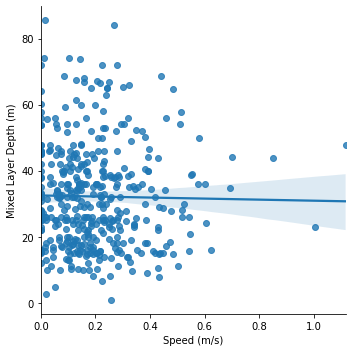

In [53]:
sns.lmplot(x='Speed (m/s)',y='Mixed Layer Depth (m)',data=df,fit_reg=True)
print(df['Speed (m/s)'].corr(df['Abs. Dynamic Topography (m)']))

In [54]:
def convert(row):
  switch = {
      'JAN' : 1,
      'FEB' : 2,
      'MAR' : 3,
      'APR' : 4,
      'MAY' : 5,
      'OCT' : 10,
      'NOV' : 11,
      'DEC' : 12
  }
  return switch[row['Month']]

df['Month_encoded'] = df.apply(lambda row: convert(row), axis=1)
df.head()

,Day,Month,Year,Latitude(in deg),Longitude(in Deg),Mixed Layer Depth (m),Sea Surface Temperature (in deg C),Sea Surface Salinity,U Velocity (m/s),V Velocity (m/s),Abs. Dynamic Topography (m),Speed (m/s),Month_encoded
0,31,JAN,2019,7.343,87.558,44.0,28.51,33.773,-0.733,-0.163,0.058,0.700289,1
1,31,JAN,2019,9.452,89.781,46.0,28.21,33.077,-0.324,-0.103,0.031,0.207976,1
2,30,JAN,2019,9.409,85.940,47.9,28.34,33.945,-0.052,-0.032,0.068,0.034704,1
3,30,JAN,2019,17.700,88.783,25.2,25.66,32.095,-0.026,-0.018,0.115,0.018676,1
4,29,JAN,2019,5.679,78.103,35.0,27.76,34.112,-0.511,-0.060,0.038,0.321121,1


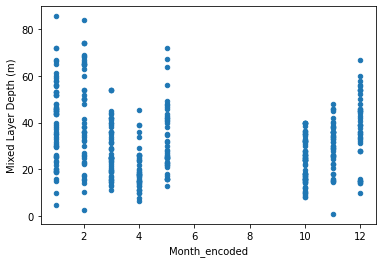

In [55]:
df.plot.scatter(x='Month_encoded', y='Mixed Layer Depth (m)')

In [56]:
def date_to_num(row):
  switch_num = {
      'JAN' : 0,
      'FEB' : 31,
      'MAR' : 59,
      'APR' : 90,
      'MAY' : 120,
      'OCT' : 273,
      'NOV' : 304,
      'DEC' : 334
  }
  return int(row['Day']) + switch_num[row['Month']]

df['Day_encoded'] = df.apply(lambda row: date_to_num(row), axis=1)
df.head()

,Day,Month,Year,Latitude(in deg),Longitude(in Deg),Mixed Layer Depth (m),Sea Surface Temperature (in deg C),Sea Surface Salinity,U Velocity (m/s),V Velocity (m/s),Abs. Dynamic Topography (m),Speed (m/s),Month_encoded,Day_encoded
0,31,JAN,2019,7.343,87.558,44.0,28.51,33.773,-0.733,-0.163,0.058,0.700289,1,31
1,31,JAN,2019,9.452,89.781,46.0,28.21,33.077,-0.324,-0.103,0.031,0.207976,1,31
2,30,JAN,2019,9.409,85.940,47.9,28.34,33.945,-0.052,-0.032,0.068,0.034704,1,30
3,30,JAN,2019,17.700,88.783,25.2,25.66,32.095,-0.026,-0.018,0.115,0.018676,1,30
4,29,JAN,2019,5.679,78.103,35.0,27.76,34.112,-0.511,-0.060,0.038,0.321121,1,29


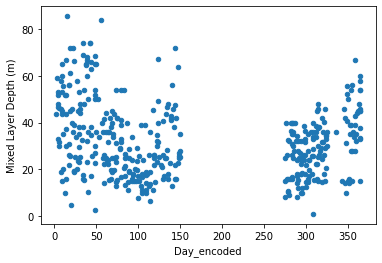

In [57]:
df.plot.scatter(x='Day_encoded', y='Mixed Layer Depth (m)')

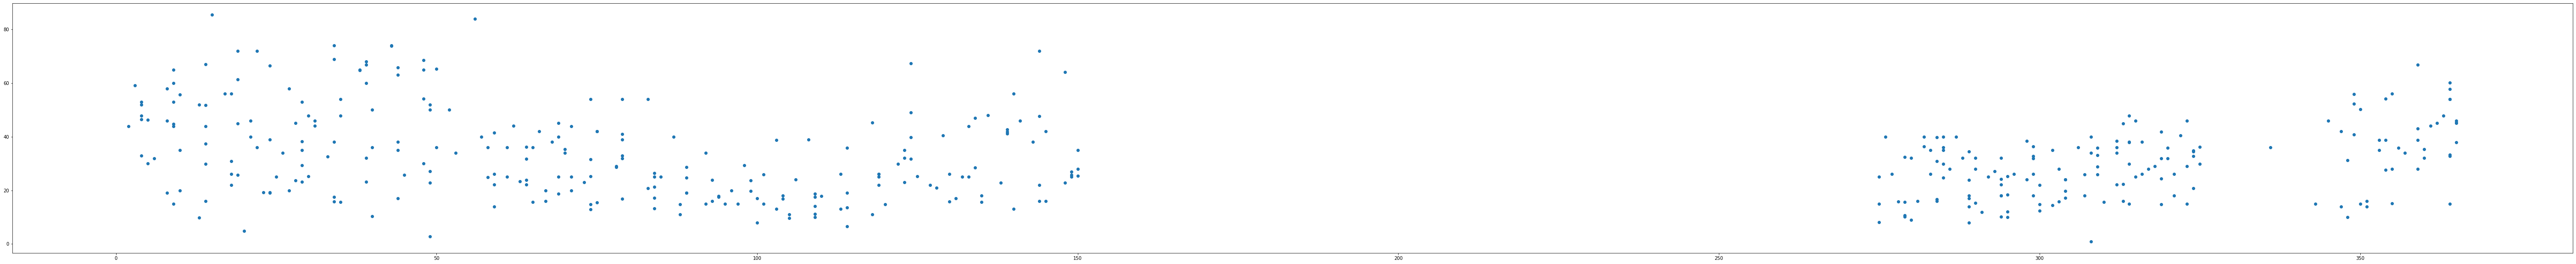

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,10))
plt.scatter(df['Day_encoded'],df['Mixed Layer Depth (m)'])
plt.show()

In [59]:
data = pd.DataFrame()
data['lag_1'] = df['Mixed Layer Depth (m)'].shift(1)
data['Day_encoded'] = df['Day_encoded']
data['Month_encoded'] = df['Month_encoded']
data['rolling_mean'] = df['Mixed Layer Depth (m)'].rolling(window=5).mean()
data['Latitude(in deg)'] = df['Latitude(in deg)']
data['Longitude(in Deg)'] = df['Longitude(in Deg)']
data['U Velocity (m/s)'] = df['U Velocity (m/s)']
data['V Velocity (m/s)'] = df['V Velocity (m/s)']
data['Speed (m/s)'] = df['Speed (m/s)']
data['Abs. Dynamic Topography (m)'] = df['Abs. Dynamic Topography (m)']
data['Sea Surface Temperature (in deg C)'] = df['Sea Surface Temperature (in deg C)']
data['Sea Surface Salinity'] = df['Sea Surface Salinity']
data['Mixed Layer Depth (m)'] = df['Mixed Layer Depth (m)']

In [60]:
data.head()

,lag_1,Day_encoded,Month_encoded,rolling_mean,Latitude(in deg),Longitude(in Deg),U Velocity (m/s),V Velocity (m/s),Speed (m/s),Abs. Dynamic Topography (m),Sea Surface Temperature (in deg C),Sea Surface Salinity,Mixed Layer Depth (m)
0,NaN,31,1,NaN,7.343,87.558,-0.733,-0.163,0.700289,0.058,28.51,33.773,44.0
1,44.0,31,1,NaN,9.452,89.781,-0.324,-0.103,0.207976,0.031,28.21,33.077,46.0
2,46.0,30,1,NaN,9.409,85.940,-0.052,-0.032,0.034704,0.068,28.34,33.945,47.9
3,47.9,30,1,NaN,17.700,88.783,-0.026,-0.018,0.018676,0.115,25.66,32.095,25.2
4,25.2,29,1,39.62,5.679,78.103,-0.511,-0.060,0.321121,0.038,27.76,34.112,35.0


0.17296780436619918


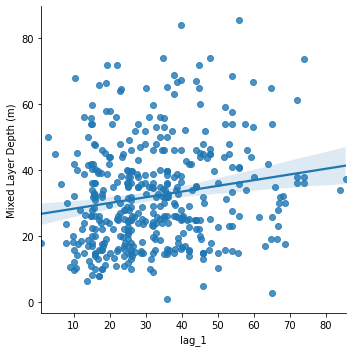

In [61]:
sns.lmplot(x='lag_1',y='Mixed Layer Depth (m)',data=data,fit_reg=True)
print(data['Mixed Layer Depth (m)'].corr(data['lag_1']))

0.605915337913154


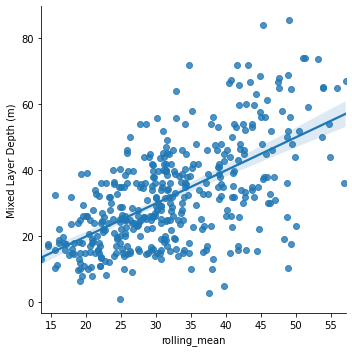

In [62]:
sns.lmplot(x='rolling_mean',y='Mixed Layer Depth (m)',data=data,fit_reg=True)
print(data['Mixed Layer Depth (m)'].corr(data['rolling_mean']))

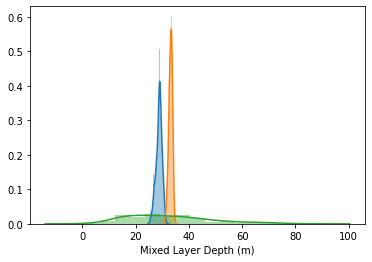

In [63]:
sns.distplot(data['Sea Surface Temperature (in deg C)'])
sns.distplot(data['Sea Surface Salinity'])
sns.distplot(data['Mixed Layer Depth (m)'])

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['lag_1','rolling_mean','U Velocity (m/s)','V Velocity (m/s)','Speed (m/s)','Abs. Dynamic Topography (m)','Sea Surface Temperature (in deg C)','Sea Surface Salinity','Mixed Layer Depth (m)']] = scaler.fit_transform(data[['lag_1','rolling_mean','U Velocity (m/s)','V Velocity (m/s)','Speed (m/s)','Abs. Dynamic Topography (m)','Sea Surface Temperature (in deg C)','Sea Surface Salinity','Mixed Layer Depth (m)']])

In [65]:
data.head()

,lag_1,Day_encoded,Month_encoded,rolling_mean,Latitude(in deg),Longitude(in Deg),U Velocity (m/s),V Velocity (m/s),Speed (m/s),Abs. Dynamic Topography (m),Sea Surface Temperature (in deg C),Sea Surface Salinity,Mixed Layer Depth (m)
0,NaN,31,1,NaN,7.343,87.558,-3.031679,-1.028664,3.166648,0.407947,-0.224991,0.985998,0.756910
1,0.754437,31,1,NaN,9.452,89.781,-1.116933,-0.717705,0.084334,0.208811,-0.497754,-0.042378,0.885046
2,0.882628,30,1,NaN,9.409,85.940,0.156444,-0.349736,-1.000502,0.481702,-0.379557,1.240137,1.006776
3,1.004411,30,1,NaN,17.700,88.783,0.278164,-0.277179,-1.100851,0.828346,-2.816240,-1.493333,-0.447570
4,-0.450567,29,1,0.788504,5.679,78.103,-1.992379,-0.494851,0.792721,0.260439,-0.906899,1.486888,0.180297


In [66]:
data = data.drop([0,1,2,3])
data.head()

,lag_1,Day_encoded,Month_encoded,rolling_mean,Latitude(in deg),Longitude(in Deg),U Velocity (m/s),V Velocity (m/s),Speed (m/s),Abs. Dynamic Topography (m),Sea Surface Temperature (in deg C),Sea Surface Salinity,Mixed Layer Depth (m)
4,-0.450567,29,1,0.788504,5.679,78.103,-1.992379,-0.494851,0.792721,0.260439,-0.906899,1.486888,0.180297
5,0.177573,29,1,0.979116,13.467,88.683,-1.182474,0.432845,0.242534,0.157183,-1.106925,0.751067,1.333523
6,1.331300,29,1,0.496232,12.950,91.183,-0.335117,-0.329006,-0.888150,0.651336,-1.206938,-1.717921,-0.575706
7,-0.578758,29,1,0.290795,14.733,85.633,-0.587920,0.256635,-0.406864,-0.543482,-1.888845,0.405320,0.385315
8,0.382680,29,1,0.379747,13.933,89.483,-1.116933,0.013050,-0.322624,0.643961,-1.643359,-1.104737,-0.178484


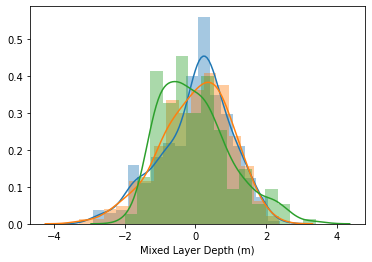

In [67]:
sns.distplot(data['Sea Surface Temperature (in deg C)'])
sns.distplot(data['Sea Surface Salinity'])
sns.distplot(data['Mixed Layer Depth (m)'])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:12], data.iloc[:,12], test_size=0.4, random_state=42)
X_train

,lag_1,Day_encoded,Month_encoded,rolling_mean,Latitude(in deg),Longitude(in Deg),U Velocity (m/s),V Velocity (m/s),Speed (m/s),Abs. Dynamic Topography (m),Sea Surface Temperature (in deg C),Sea Surface Salinity
250,0.478824,124,5,0.902871,13.617,86.217,-0.171263,0.401749,-0.417113,1.197117,0.365995,0.649116
107,1.004411,34,2,2.025363,9.282,85.930,0.690139,0.329192,-0.573885,0.208811,-1.179662,1.509051
85,-0.142906,48,2,2.304927,15.062,87.459,-0.339798,0.634969,-0.072264,-0.100957,-1.543346,-0.071929
224,-0.655673,144,5,0.265380,6.155,86.624,0.399884,-0.183891,-1.217780,1.433131,0.929705,1.399712
397,-1.097935,355,12,0.170074,6.136,90.353,-0.292983,2.386707,2.024757,0.466951,0.256890,0.421573
...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.139012,50,2,1.758507,10.669,90.269,-1.430595,0.080424,0.058695,0.002299,0.256890,-0.924476
110,2.344015,34,2,1.809336,13.150,91.250,-0.344480,-0.650330,-0.496019,0.334193,-1.316043,-1.069276
274,-0.021124,304,10,-0.814754,14.483,85.867,-0.733047,0.013050,-0.613204,-0.934379,0.093232,-0.967325
352,0.498053,307,11,-0.293749,9.493,86.433,-0.798589,0.339557,-0.175117,0.053927,0.556929,0.765843


In [93]:
# model 1
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 200, min_samples_leaf = 4)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.4309195936012483

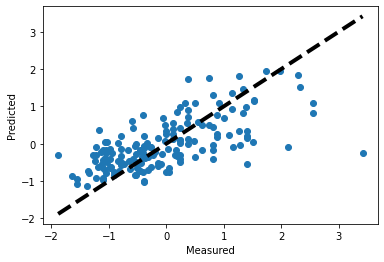

In [95]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [98]:
# model 2
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(learning_rate = 0.3, min_samples_leaf = 8, subsample = 0.5)

clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

In [99]:
r2_score(y_test,y_predict)

0.16612308545658183

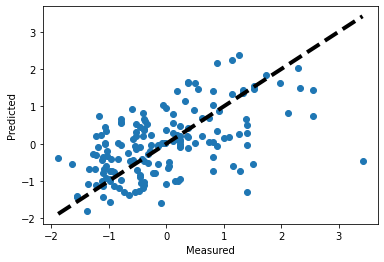

In [101]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [32]:
td = pd.read_excel('/content/drive/My Drive/SIH/NM390.xlsx')

In [33]:
td['lag_5'] = td['Mixed Layer Depth (m)'].shift(5)
td['lag_4'] = td['Mixed Layer Depth (m)'].shift(4)
td['lag_3'] = td['Mixed Layer Depth (m)'].shift(3)
td['lag_2'] = td['Mixed Layer Depth (m)'].shift(2)
td['lag_1'] = td['Mixed Layer Depth (m)'].shift(1)
td['rolling_mean'] = td['Mixed Layer Depth (m)'].rolling(window=6).mean()
td = td.drop([0,1,2,3,4])
td.head()

,Day,Month,Year,Latitude(in deg),Longitude(in Deg),Mixed Layer Depth (m),Sea Surface Temperature (in deg C),Sea Surface Salinity,U Velocity (m/s),V Velocity (m/s),Abs. Dynamic Topography (m),lag_5,lag_4,lag_3,lag_2,lag_1,rolling_mean
5,29,JAN,2019,13.467,88.683,53.0,27.54,33.614,-0.338,0.119,0.024,44.0,46.0,47.9,25.2,35.0,41.850000
6,29,JAN,2019,12.950,91.183,23.2,27.43,31.943,-0.157,-0.028,0.091,46.0,47.9,25.2,35.0,53.0,38.383333
7,29,JAN,2019,14.733,85.633,38.2,26.68,33.380,-0.211,0.085,-0.071,47.9,25.2,35.0,53.0,23.2,37.083333
8,29,JAN,2019,13.933,89.483,29.4,26.95,32.358,-0.324,0.038,0.090,25.2,35.0,53.0,23.2,38.2,34.000000
9,28,JAN,2019,12.933,82.317,23.6,26.32,33.012,0.426,-0.161,-0.061,35.0,53.0,23.2,38.2,29.4,33.733333


In [34]:
X_tr, X_te, y_tr, y_te = train_test_split(td[[r for r in td.columns if r != 'Mixed Layer Depth (m)']],td['Mixed Layer Depth (m)'],test_size=0.4)
X_te

,Day,Month,Year,Latitude(in deg),Longitude(in Deg),Sea Surface Temperature (in deg C),Sea Surface Salinity,U Velocity (m/s),V Velocity (m/s),Abs. Dynamic Topography (m),lag_5,lag_4,lag_3,lag_2,lag_1,rolling_mean
297,15,OCT,2018,12.183,82.400,29.64,33.510,0.000,0.000,-0.151,23.9,14.0,17.0,8.0,18.0,18.816667
49,9,JAN,2019,13.967,88.533,27.48,33.591,-0.241,0.000,-0.042,43.9,35.0,55.7,15.0,59.9,43.750000
191,14,APR,2019,13.567,85.817,30.03,32.843,0.238,-0.034,0.028,17.6,39.0,17.9,10.0,9.7,18.716667
138,16,MAR,2019,8.562,87.829,29.61,33.282,-0.025,0.159,-0.011,31.9,29.0,28.7,15.5,42.0,31.516667
194,13,APR,2019,14.067,82.717,29.97,33.750,0.145,0.529,0.075,10.0,9.7,18.1,16.9,13.0,17.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,29,APR,2019,13.533,86.167,31.39,33.228,-0.073,0.424,0.139,36.0,14.7,26.1,26.0,25.0,24.950000
55,6,JAN,2019,5.309,90.203,29.22,33.238,0.092,0.105,0.033,44.8,64.9,19.0,58.0,46.0,44.100000
346,8,NOV,2018,5.268,92.527,29.16,32.735,0.097,-0.309,0.059,46.0,15.0,22.4,16.0,36.0,28.966667
67,28,FEB,2019,14.600,85.683,28.04,33.523,-0.052,0.043,0.011,52.0,59.2,43.9,22.2,26.1,36.233333


In [35]:
y_tr

294    17.0
345    36.0
54     46.0
407    14.0
8      29.4
       ... 
163    31.7
306    39.8
40     52.0
265    27.9
13     33.9
Name: Mixed Layer Depth (m), Length: 247, dtype: float64

In [36]:
# model 3 
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

lrm.fit(X_tr[['lag_1','lag_2','lag_3','lag_4','lag_5']],y_tr)
y_predict = lrm.predict(X_te[['lag_1','lag_2','lag_3','lag_4','lag_5']])

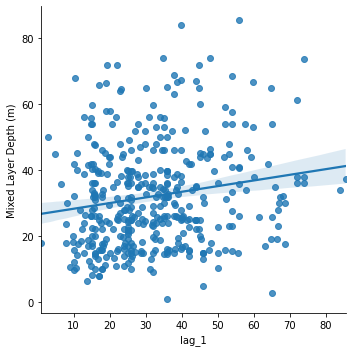

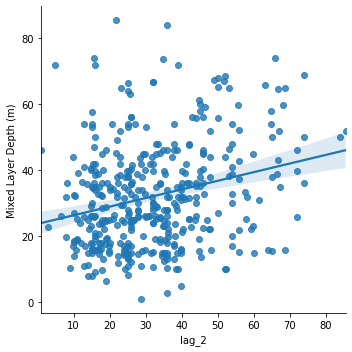

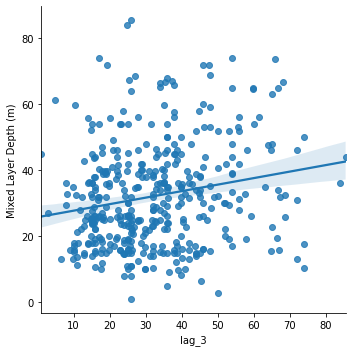

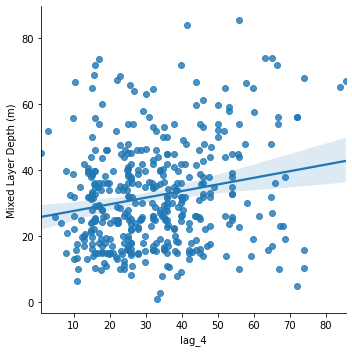

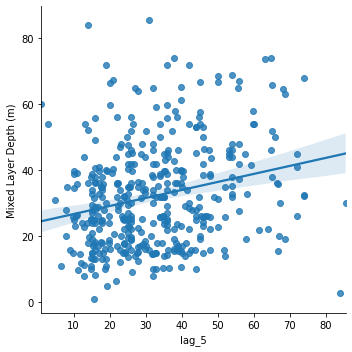

In [37]:
sns.lmplot(x='lag_1',y='Mixed Layer Depth (m)',data=td,fit_reg=True)
sns.lmplot(x='lag_2',y='Mixed Layer Depth (m)',data=td,fit_reg=True)
sns.lmplot(x='lag_3',y='Mixed Layer Depth (m)',data=td,fit_reg=True)
sns.lmplot(x='lag_4',y='Mixed Layer Depth (m)',data=td,fit_reg=True)
sns.lmplot(x='lag_5',y='Mixed Layer Depth (m)',data=td,fit_reg=True)

In [38]:
print(td['Mixed Layer Depth (m)'].corr(td['lag_1']))
print(td['Mixed Layer Depth (m)'].corr(td['lag_2']))
print(td['Mixed Layer Depth (m)'].corr(td['lag_3']))
print(td['Mixed Layer Depth (m)'].corr(td['lag_4']))
print(td['Mixed Layer Depth (m)'].corr(td['lag_5']))

0.17142362667231523
0.26141772684428627
0.19711426156992837
0.2006893882475621
0.2427387846211341


In [39]:
r2_score(y_te,y_predict)

0.11852617963994916

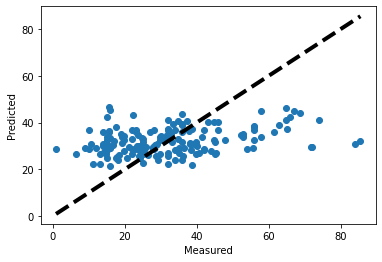

In [40]:
fig, ax = plt.subplots()
ax.scatter(y_te, y_predict)
ax.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

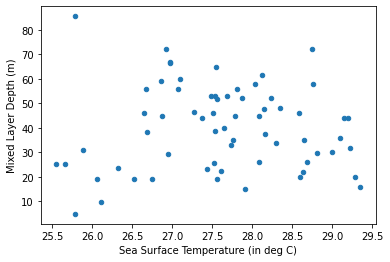

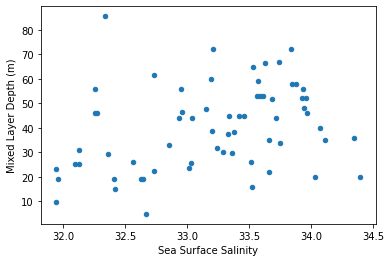

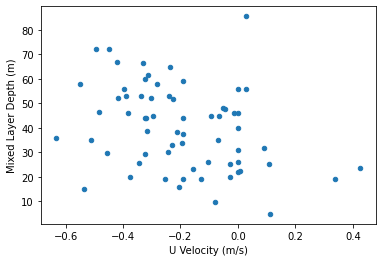

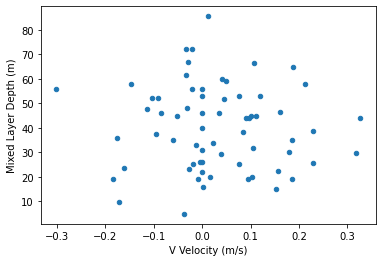

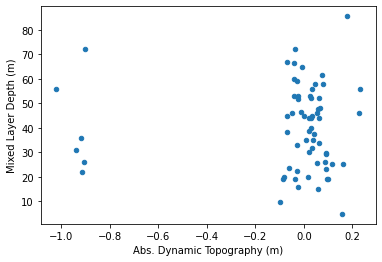

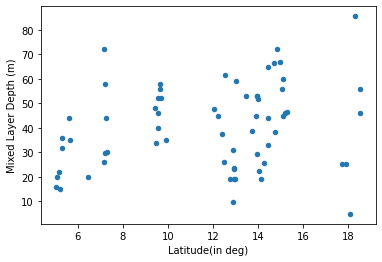

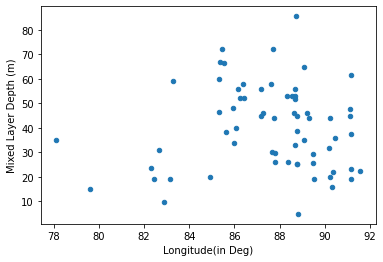

In [41]:
# Further Analysis  Month Wise

df.iloc[2:67].plot.scatter(x='Sea Surface Temperature (in deg C)', y='Mixed Layer Depth (m)')
df.iloc[2:67].plot.scatter(x='Sea Surface Salinity', y='Mixed Layer Depth (m)')
df.iloc[2:67].plot.scatter(x='U Velocity (m/s)', y='Mixed Layer Depth (m)')
df.iloc[2:67].plot.scatter(x='V Velocity (m/s)', y='Mixed Layer Depth (m)')
df.iloc[2:67].plot.scatter(x='Abs. Dynamic Topography (m)', y='Mixed Layer Depth (m)')
df.iloc[2:67].plot.scatter(x='Latitude(in deg)', y='Mixed Layer Depth (m)')
df.iloc[2:67].plot.scatter(x='Longitude(in Deg)', y='Mixed Layer Depth (m)')

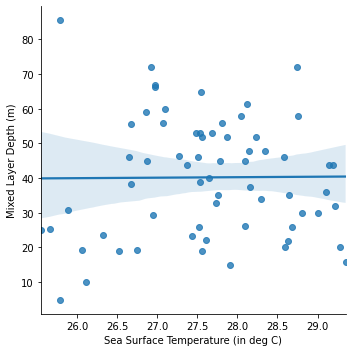

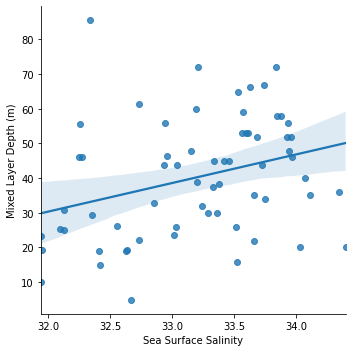

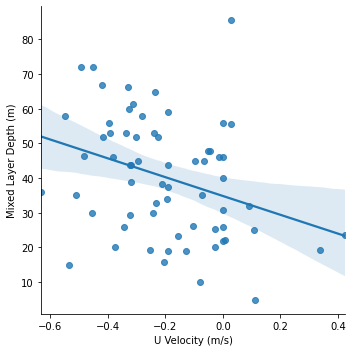

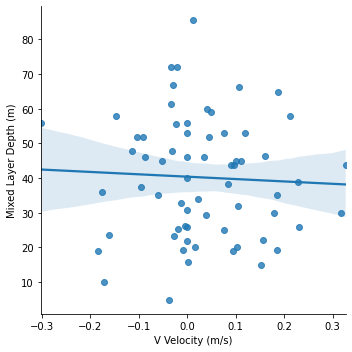

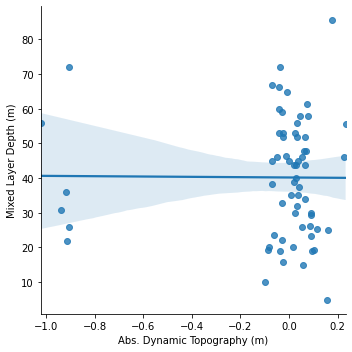

In [42]:
import seaborn as sns
sns.lmplot(x='Sea Surface Temperature (in deg C)',y='Mixed Layer Depth (m)',data=df.iloc[2:67],fit_reg=True)
sns.lmplot(x='Sea Surface Salinity',y='Mixed Layer Depth (m)',data=df.iloc[2:67],fit_reg=True)
sns.lmplot(x='U Velocity (m/s)',y='Mixed Layer Depth (m)',data=df.iloc[2:67],fit_reg=True)
sns.lmplot(x='V Velocity (m/s)',y='Mixed Layer Depth (m)',data=df.iloc[2:67],fit_reg=True)
sns.lmplot(x='Abs. Dynamic Topography (m)',y='Mixed Layer Depth (m)',data=df.iloc[2:67],fit_reg=True)

In [43]:
print(df.iloc[2:67]['Mixed Layer Depth (m)'].corr(df.iloc[2:67]['Sea Surface Temperature (in deg C)']))
print(df.iloc[2:67]['Mixed Layer Depth (m)'].corr(df.iloc[2:67]['Sea Surface Salinity']))
print(df.iloc[2:67]['Mixed Layer Depth (m)'].corr(df.iloc[2:67]['U Velocity (m/s)']))
print(df.iloc[2:67]['Mixed Layer Depth (m)'].corr(df.iloc[2:67]['V Velocity (m/s)']))
print(df.iloc[2:67]['Mixed Layer Depth (m)'].corr(df.iloc[2:67]['Abs. Dynamic Topography (m)']))

0.007990159326295498
0.316141426004448
-0.3298863254291615
-0.048095119782718264
-0.007773206640676529


0.07381983212502807


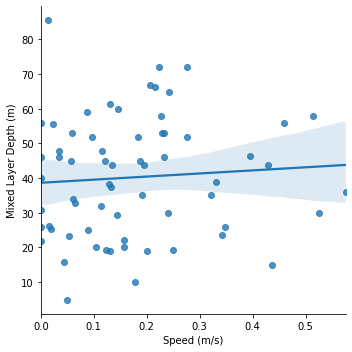

In [44]:
sns.lmplot(x='Speed (m/s)',y='Mixed Layer Depth (m)',data=df.iloc[2:67],fit_reg=True)
print(df.iloc[2:67]['Speed (m/s)'].corr(df.iloc[2:67]['Mixed Layer Depth (m)']))